# Radon-CDT Demo

This notebook accompanies the following tutorial:

https://github.com/skolouri/Radon-Cumulative-Distribution-Transform


In [1]:
import sys
sys.path.append('./transportBasedTransforms/')
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import radon,iradon
import transportBasedTransforms.radonCDT as RCDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.ndimage import filters
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

## Nonlinearty experiment

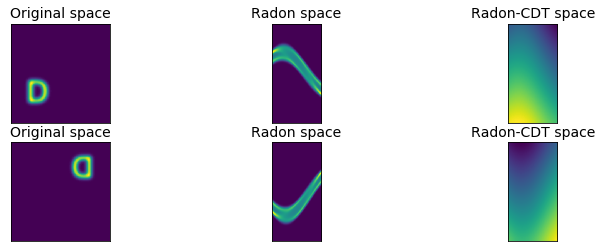

In [4]:
#Get a Radon-CDT object
theta=np.arange(180)
rcdt=RCDT.RadonCDT(theta)
# Load images and calculate their Radon-CDT
I=[]
rI=[]
Ihat=[]
indices=[0,2]
for i,ind in enumerate(indices):
    I.append(rgb2gray(imread('./Data/I%d.bmp'%(ind))))
    rI.append(radon(I[i],theta,circle=False))
    Ihat.append(rcdt.transform(I[i]))
data=[I,rI,Ihat]
fig,ax=plt.subplots(2,3,figsize=(12,4))
title=['Original space','Radon space','Radon-CDT space']
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(data[j][i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])    
        ax[i,j].set_title(title[j],fontsize=14)

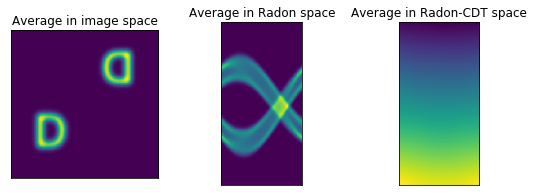

In [5]:
fig, ax=plt.subplots(1,3,figsize=(9,3))
title=['Average in image space','Average in Radon space', 'Average in Radon-CDT space']
avg=[]
for i in range(3):
    avg.append(0.5*(data[i][0]+data[i][1]))    
    ax[i].imshow(avg[i])
    ax[i].set_title(title[i],fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

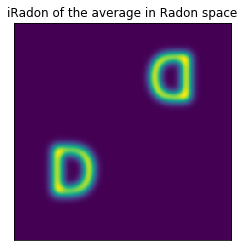

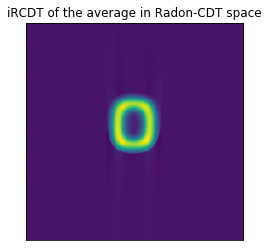

In [6]:
plt.imshow(iradon(avg[1],circle=False))
plt.xticks([])
plt.yticks([])
plt.title('iRadon of the average in Radon space')
plt.show()
plt.imshow(rcdt.itransform(avg[2]))
plt.xticks([])
plt.yticks([])
plt.title('iRCDT of the average in Radon-CDT space')
plt.show()